### 딥-러닝 과정 CNN 

### 두번째 실습. Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [91]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14040277138937816784,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7797735424
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14410370899509746185
 physical_device_desc: "device: 0, name: NVIDIA Tesla M60, pci bus id: 0001:00:00.0, compute capability: 5.2"]

In [92]:
# 1. 데이터 불러오기
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

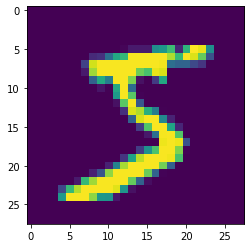

In [93]:
# 2. 이미지 데이터 확인하기 🖼
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [94]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [95]:
# 3-2. 이미지 데이터 전처리 : Normalzation 
x_train, x_test = x_train/255.0, x_test/255.0

In [96]:
import numpy as np
def to_rgb(x):
    x_rgb = np.zeros((x.shape[0], 28, 28, 3))
    for i in range(3):
        x_rgb[..., i] = x[..., 0]
    return x_rgb
x_train = to_rgb(x_train)
x_test = to_rgb(x_test)

In [97]:
# # 4. Label 전처리 (one-hot encoding) 
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [98]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [99]:
# 5. 모델 생성 : CNN 🌟🌟🌟
# model = keras.Sequential([Conv2D(512, activation='relu', kernel_size=(5,5), input_shape=(28,28,3), padding='same'),
#                           MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#                           Conv2D(256, activation='relu', kernel_size=(2,2)),
#                           MaxPooling2D(pool_size=(2,2), strides=(2,2)),
#                           Dropout(0.3),
#                           Flatten(),
#                           Dense(512, activation='relu'),
#                           Dropout(0.4),
#                           Dense(10, activation='softmax')])

model = keras.Sequential(
    [
     keras.Input(shape=(28,28,3)),
     layers.Conv2D(16, 3, activation='relu'),
     layers.MaxPooling2D(),
     layers.Flatten(),
     layers.Dense(10)
    ]
)

In [100]:
model.compile(
  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=keras.optimizers.Adam(),
  metrics=['accuracy']
)

In [101]:
# 7. 모델 학습시키기
# hist = model.fit(x_train, y_train, batch_size=64, epochs=3, validation_data=(x_test,y_test))
hist = model.fit(
        x_train, 
        y_train, 
        epochs=10, 
        batch_size=32, 
        validation_data = (x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2266 - accuracy: 0.9347 - val_loss: 0.0934 - val_accuracy: 0.9740
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0850 - accuracy: 0.9750 - val_loss: 0.0695 - val_accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9807 - val_loss: 0.0628 - val_accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9840 - val_loss: 0.0613 - val_accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0650 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.0545 - val_accuracy: 0.9830
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0326 - accuracy: 0.9896 - val_loss: 0.0596 - val_accuracy:

In [102]:
# 8. 모델 평가하기
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0644 - accuracy: 0.9817


[0.06439057737588882, 0.9817000031471252]

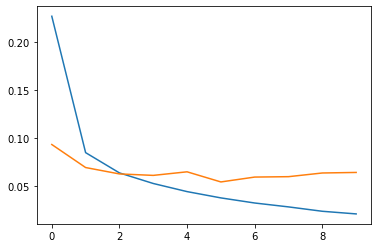

In [103]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [84]:
! pip install lime

In [104]:
## 10. 학습 시각화하기
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import random

  0%|          | 0/1000 [00:00<?, ?it/s]

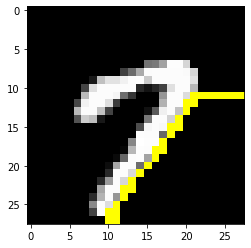

In [105]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(x_train[15], model.predict)
plt.imshow(x_train[15])
image, mask = explanation.get_image_and_mask(
         model.predict(
              x_train[15].reshape((1,28,28,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=True)
plt.imshow(mark_boundaries(image, mask))

In [106]:
model.save('mnist_gpu_model.h5')

In [220]:
import cv2
i1 = cv2.imread('i1.png')
i1.shape

(400, 800, 3)

In [221]:
i1 = i1/255

In [222]:
i1_resized = cv2.resize(i1, dsize=(28,28))
print(i1_resized.shape)

(28, 28, 3)


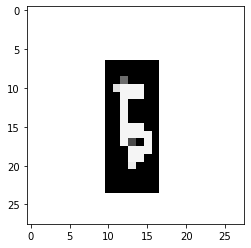

In [223]:
plt.imshow(i1_resized)

In [228]:
result = model.predict_classes(i1_resized.reshape(1,28,28,3))

/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [229]:
result

array([8])

  0%|          | 0/1000 [00:00<?, ?it/s]

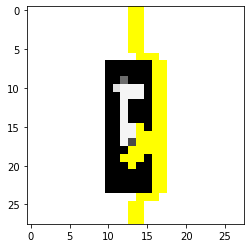

In [230]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(i1_resized, model.predict)
plt.imshow(i1_resized)
image, mask = explanation.get_image_and_mask(
         model.predict(
              i1_resized.reshape((1,28,28,3))
         ).argmax(axis=1)[0],
         positive_only=True, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))

In [141]:
# image_size = (28, 28)
# image_shape = (1,28,28,3)

# image_names = ['i1.png', 'i2.png', 'i3.png']

# for i in image_names:
#     image = cv2.imread(i)
    
#     image_resized = cv2.resize(i, dsize=image_size, interpolataion=cv2.INTER_AREA)
    
#     plt.imshow(image_resized)
#     plt.show()
    
#     result = model.predict_classes(image_resized.reshape(image_shape))
#     print(result)